# 데이터 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel("total.xlsx")
print(df.shape)
df.head()

(7043, 46)


,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Service ID,...,Total Revenue,Status ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,IJKDQVSWH3522,...,59.65,SWSORB1252,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,BFKMZJAIE2285,...,1024.10,SNAEQA8572,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,EIMVJQBMT7187,...,1910.88,LMBQNN3714,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,EROZQXDUU4979,...,2995.07,VRZYZI9978,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,GEEYSJUHY6991,...,3102.36,FDNAKX1688,2,Churned,Yes,1,67,2793,Price,Extra data charges


# label값 맞추기

## Yes, No -> 1, 0

In [3]:
target_cols = ['Under 30','Senior Citizen', 'Married', 'Dependents', 'Referred a Friend',
              'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
              'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
              'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
              'Paperless Billing', 'Churn Label']

for col in target_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    

df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Service ID,...,Total Revenue,Status ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,0,1,0,0,0,IJKDQVSWH3522,...,59.65,SWSORB1252,3,Churned,1,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,0,1,1,1,1,BFKMZJAIE2285,...,1024.10,SNAEQA8572,3,Churned,1,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,0,1,0,1,3,EIMVJQBMT7187,...,1910.88,LMBQNN3714,2,Churned,1,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,0,1,1,1,1,EROZQXDUU4979,...,2995.07,VRZYZI9978,2,Churned,1,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,0,1,1,1,1,GEEYSJUHY6991,...,3102.36,FDNAKX1688,2,Churned,1,1,67,2793,Price,Extra data charges


## Female, Male -> 1, 0

In [4]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Service ID,...,Total Revenue,Status ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,0,78,0,1,0,0,0,IJKDQVSWH3522,...,59.65,SWSORB1252,3,Churned,1,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,1,74,0,1,1,1,1,BFKMZJAIE2285,...,1024.10,SNAEQA8572,3,Churned,1,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,0,71,0,1,0,1,3,EIMVJQBMT7187,...,1910.88,LMBQNN3714,2,Churned,1,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,1,78,0,1,1,1,1,EROZQXDUU4979,...,2995.07,VRZYZI9978,2,Churned,1,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,1,80,0,1,1,1,1,GEEYSJUHY6991,...,3102.36,FDNAKX1688,2,Churned,1,1,67,2793,Price,Extra data charges


# 결측치 확인

In [5]:
df_null = df.isnull()
df_null.sum()
# status 컬럼 제외한 나머지 feature들은 결측치 없음

Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Service ID                              0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support              

# 이탈 여부에 따른 EDA

In [6]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 인구통계

### 범주형

In [7]:
df_demographics = df.iloc[:,[2,3,4,5,6,7,8,40]] # customerID, count 컬럼 제외
print(df_demographics.shape)
df_demographics.head()

(7043, 8)


,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Churn Label
0,0,78,0,1,0,0,0,1
1,1,74,0,1,1,1,1,1
2,0,71,0,1,0,1,3,1
3,1,78,0,1,1,1,1,1
4,1,80,0,1,1,1,1,1


<AxesSubplot:xlabel='Dependents', ylabel='Churn Label'>

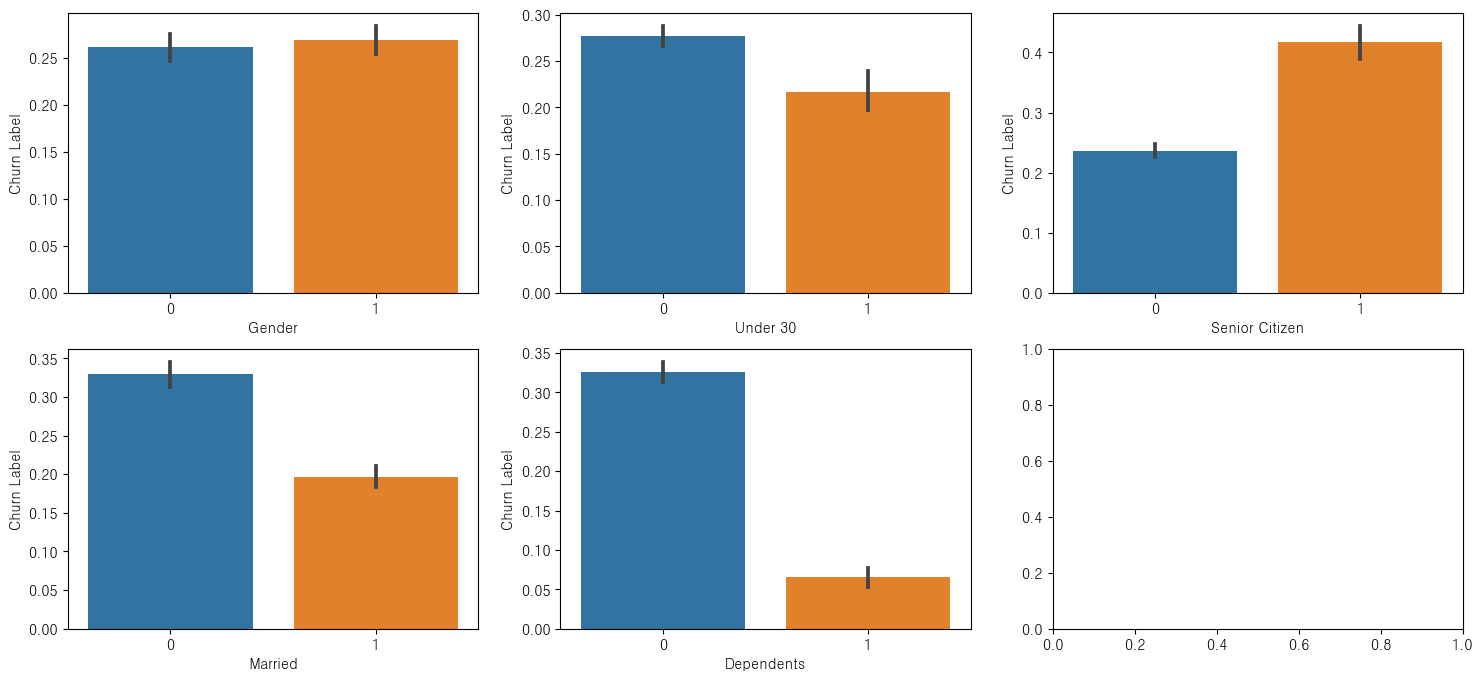

In [8]:
figure, ((ax1, ax2, ax3), ( ax4, ax5, _)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=df_demographics, x="Gender", y="Churn Label", ax=ax1)
sns.barplot(data=df_demographics, x="Under 30", y="Churn Label", ax=ax2)
sns.barplot(data=df_demographics, x="Senior Citizen", y="Churn Label", ax=ax3)
sns.barplot(data=df_demographics, x="Married", y="Churn Label", ax=ax4)
sns.barplot(data=df_demographics, x="Dependents", y="Churn Label", ax=ax5)

결과</br>
* Gender : 남녀 차이 없어보임
* Under 30 : 30세 이상의 사람들의 이탈율이 더 높다.
* Senior Citizen : 고령자(65세 이상)인 사람들의 이탈율이 더 높다.
* Married : 결혼하지 않은 사람들의 이탈율이 더 높다.
* Dependents : 부양가족이 있는 경우의 이탈율이 더 높다.

### 수치형

<AxesSubplot:xlabel='Age', ylabel='Churn Label'>

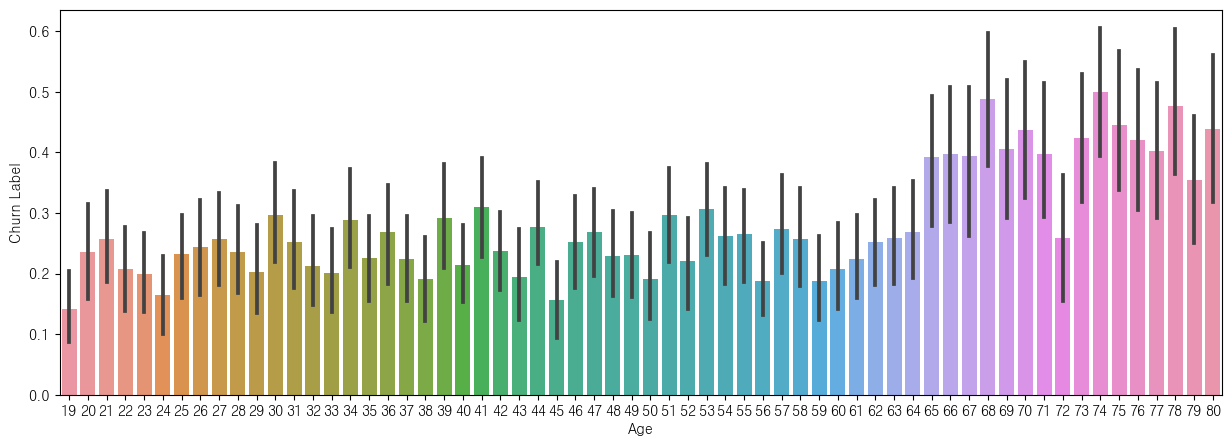

In [9]:
# Age
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df_demographics, x="Age", y="Churn Label", ax=ax1)

* Age : 연령이 높아질수록 이탈율이 높다.

<AxesSubplot:xlabel='Number of Dependents', ylabel='Churn Label'>

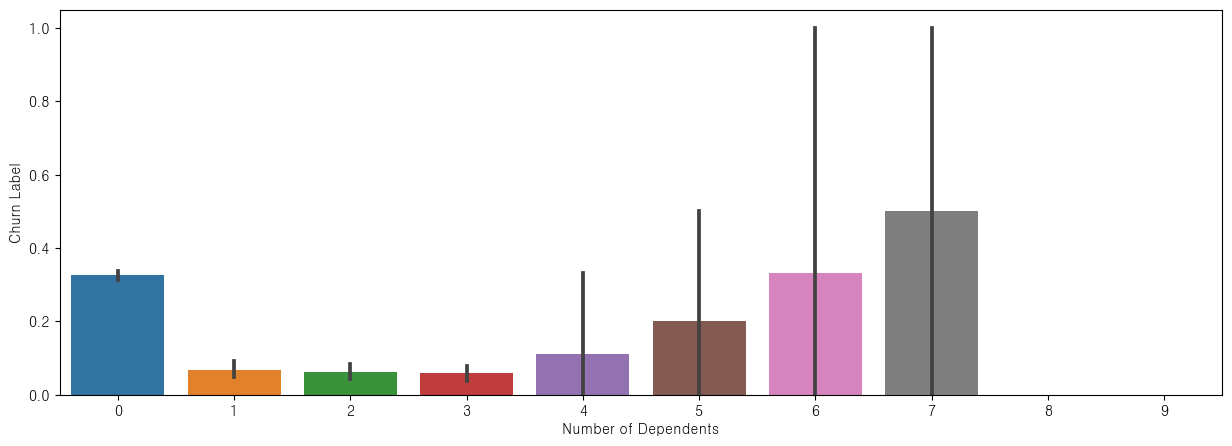

In [10]:
# Number of Dependents
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df_demographics, x="Number of Dependents", y="Churn Label", ax=ax1)

* Number of Dependents : 부양가족수가 0일 때 이탈율이 높으며 4명부터 7명까지 이탈율이 점점 높아진다. 8,9명의 경우 이상치로 판단할지 고려해야 함.

## 서비스

In [11]:
df_service = df.iloc[:,10:37]
df_service['Churn Label'] = df['Churn Label']
print(df_service.shape)
df_service.head()

(7043, 28)


,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label
0,0,0,1,None,0,0.00,0,1,DSL,8,...,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,1
1,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,17,...,Month-to-Month,1,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,1
2,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,52,...,Month-to-Month,1,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,1
3,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,12,...,Month-to-Month,1,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,1
4,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,14,...,Month-to-Month,1,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,1


### 범주형

<AxesSubplot:xlabel='Internet Service', ylabel='Churn Label'>

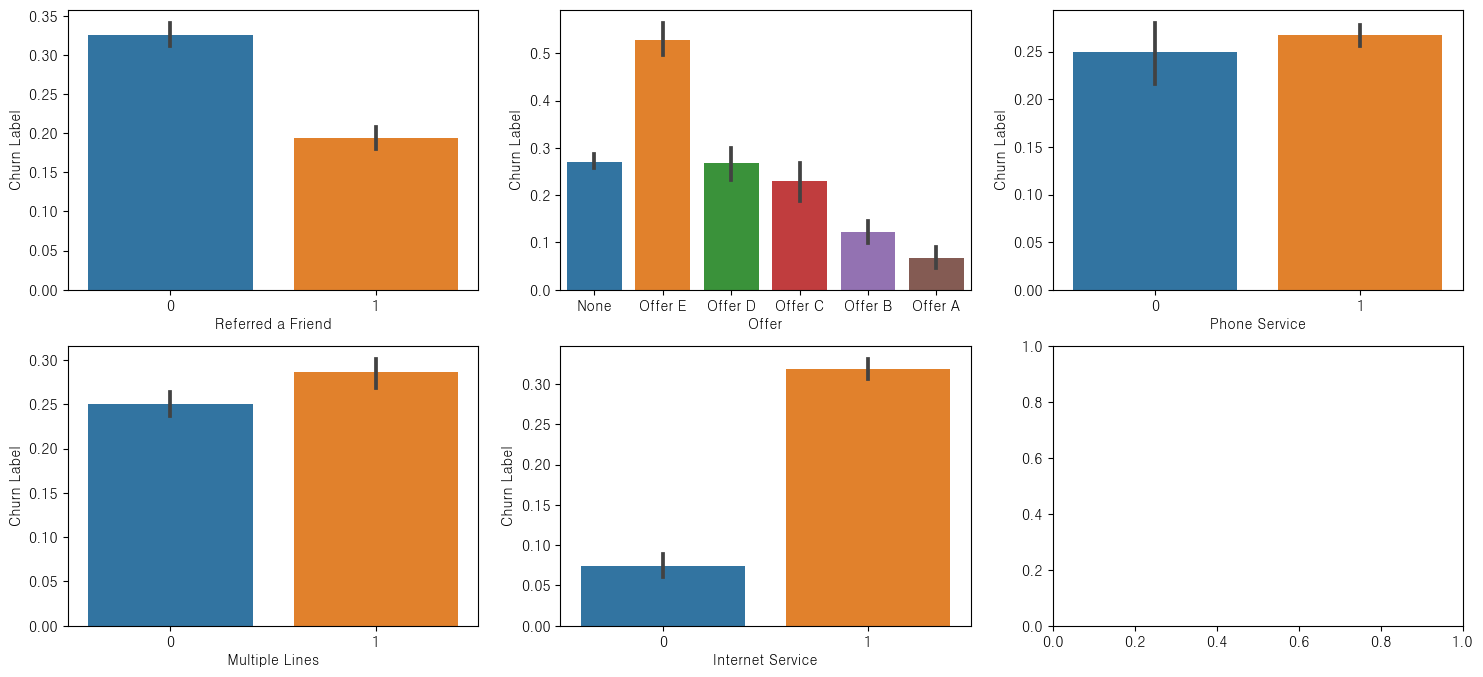

In [12]:
figure, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=df_service, y="Churn Label", x="Referred a Friend", ax=ax1)
sns.barplot(data=df_service, y="Churn Label", x="Offer", ax=ax2)
sns.barplot(data=df_service, y="Churn Label", x="Phone Service", ax=ax3)
sns.barplot(data=df_service, y="Churn Label", x="Multiple Lines", ax=ax4)
sns.barplot(data=df_service, y="Churn Label", x="Internet Service", ax=ax5)

결과</br>
* Referred a Friend : 친구나 가족을 추천한 적이 없을 수록 이탈율이 높다.
* Number of Referrals : 0번 또는 1번 추천한 사람의 이탈율이 높다.
* Offer : 제품 E를 제안받은 사람들의 이탈율이 높다. A를 제안받은 사람의 이탈율이 가장 낮다.
* Phone Service : 집 전화 서비스 가입 여부에 따른 이탈율은 뚜렷한 차이가 없다.
* Multiple Lines : 중복 회선 가입 여부에 따른 이탈율도 뚜렷한 차이가 없으나 중복회선에 가입되어 있을 경우의 이탈율이 더 높다.
* Internet Service : 인터넷 서비스에 가입되어 있을수록 이탈율이 높다.

<AxesSubplot:xlabel='Payment Method', ylabel='Churn Label'>

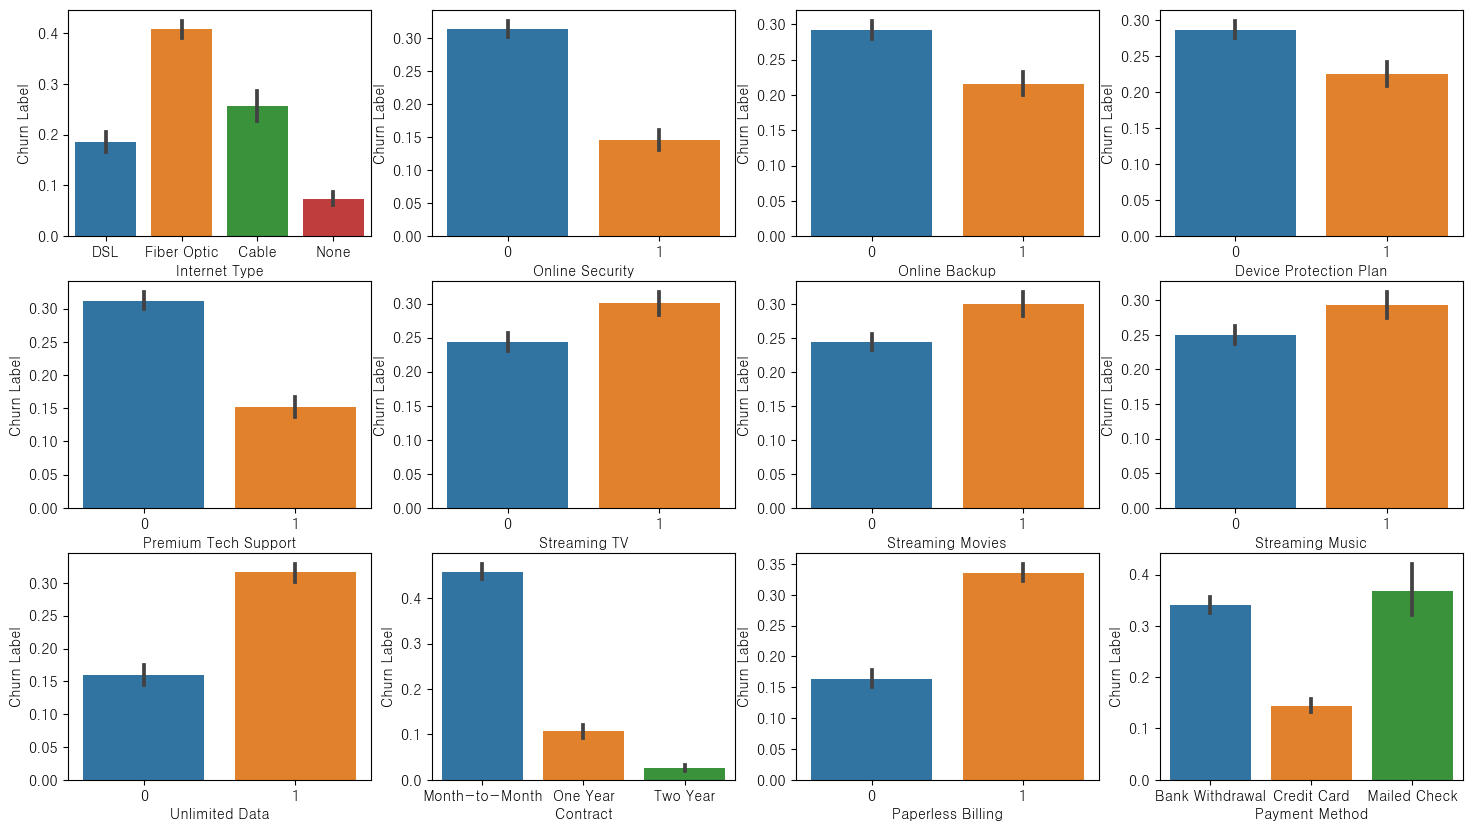

In [13]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(nrows=3, ncols=4)
figure.set_size_inches(18, 10)

sns.barplot(data=df_service, y="Churn Label", x="Internet Type", ax=ax1)
sns.barplot(data=df_service, y="Churn Label", x="Online Security", ax=ax2)
sns.barplot(data=df_service, y="Churn Label", x="Online Backup", ax=ax3)
sns.barplot(data=df_service, y="Churn Label", x="Device Protection Plan", ax=ax4)
sns.barplot(data=df_service, y="Churn Label", x="Premium Tech Support", ax=ax5)
sns.barplot(data=df_service, y="Churn Label", x="Streaming TV", ax=ax6)
sns.barplot(data=df_service, y="Churn Label", x="Streaming Movies", ax=ax7)
sns.barplot(data=df_service, y="Churn Label", x="Streaming Music", ax=ax8)
sns.barplot(data=df_service, y="Churn Label", x="Unlimited Data", ax=ax9)
sns.barplot(data=df_service, y="Churn Label", x="Contract", ax=ax10)
sns.barplot(data=df_service, y="Churn Label", x="Paperless Billing", ax=ax11)
sns.barplot(data=df_service, y="Churn Label", x="Payment Method", ax=ax12)

결과</br>
* Internet Type : 광섬유 케이블에 가입된 사람의 이탈율이 가장 높다.
* Online Security : 온라인 보안 서비스에 가입되어 있지 않은 사람의 이탈율이 높다.
* Online Backup ; 온라인 백업 서비스에 가입되어 있지 않은 사람의 이탈율이 높다.
* Device Protection Plan : 기기고장플랜 서비스에 가입되어 있지 않은 사람의 이탈율이 높다.
* Premium Tech Support : 프리미엄 기술 지원 서비스에 가입되어 있지 않은 사람의 이탈율이 높다.
* Streaming TV : 스트리밍TV 를 이용하지 않은 경우에 이탈율이 높다.
* Streaming Movies : 스트리밍 영화 서비스를 이요하지 않은 경우에 이탈율이 높다.
* Streaming Music : 스트리밍 음악 서비스를 이용하지 않는 경우 이탈율이 높다.
* Unlimited Data : 무제한 데이터 이용을 위해 추가사용료를 지불한 사람의 이탈율이 더 높다.
* Contract : 월 청구 형식으로 계약한 사람의 이탈율이 더 높다.
* Paperless Billing : 종이 청구서를 이용하지 않는 사람의 이탈율이 더 높다.
* Payment Method : 계좌이체, 우편수표로 지불할 경우 이탈율이 높다. 신용카드를 이용할수록 이탈율이 낮다.

### 수치형

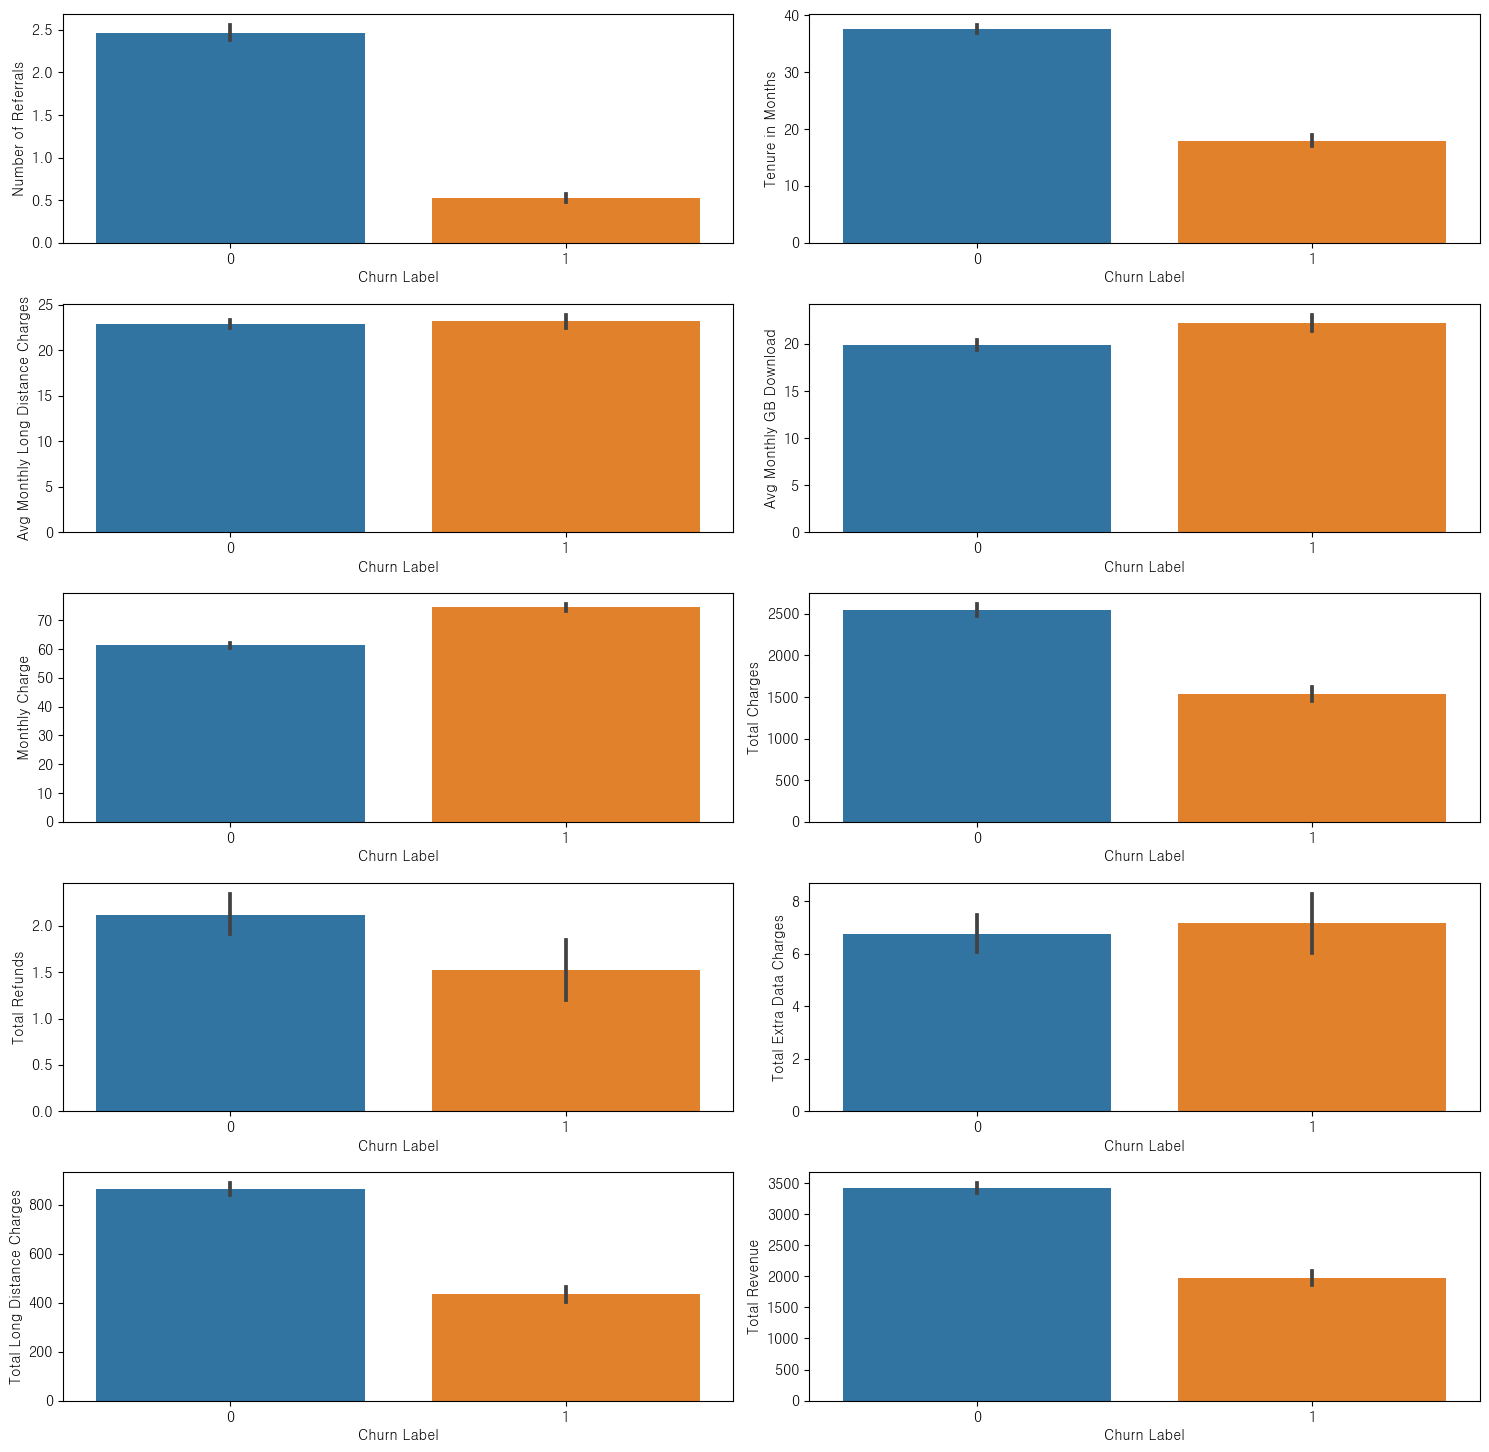

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 컬럼들
cols = ['Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
        'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
        'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# 그래프의 크기 설정
plt.figure(figsize=(15, 20))

# 서브플롯 그리기
for i, col in enumerate(cols):
    plt.subplot(7, 2, i + 1)
    #sns.barplot(y=col, x='Churn Label', data=df_service, orient='h', ci=None)
    sns.barplot(data=df_service, x="Churn Label", y=col)
    plt.ylabel(col)
    plt.xlabel('Churn Label')

# 그래프 간의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

결과</br>
* Number of Referrals : 추천한 지인이 많을수록 이탈율이 낮다.
* Tenure in Months : 단기 고객일수록 이탈율이 높다.
* Avg Monthly Long Distance Charges : 월평균 장거리 요금에 따른 이탈율의 차이는 거의 없다.
* Avg Monthly GB Download : 월평균 다운로드 용량이 크면 이탈율이 높지만 큰 차이는 없다.
* Monthly Charge : 월 요금이 높을수록 이탈율이 높다.
* Total Charges : 지정된 분기 말까지 계산된 고객의 총 요금은 낮을수록 이탈율이 높다.
* Total Refunds : 총 환불 금액이 적을수록 이탈율이 높다. => 어느 상황에서 환불이 이루어지는지? ex) 추가 데이터를 모두 사용하지 못했을 경우 등
* Total Extra Data Charges : 추가 요금의 경우 이탈할 경우, 이탈하지 않는 경우에서의 차이가 거의 없다.
* Total Long Distance Charges : 총 장거리 요금이 높을수록 이탈율이 낮다.
* Total Revenue : 총 매출?이 낮을수록 이탈율이 높다.

<AxesSubplot:xlabel='Tenure in Months', ylabel='Churn Label'>

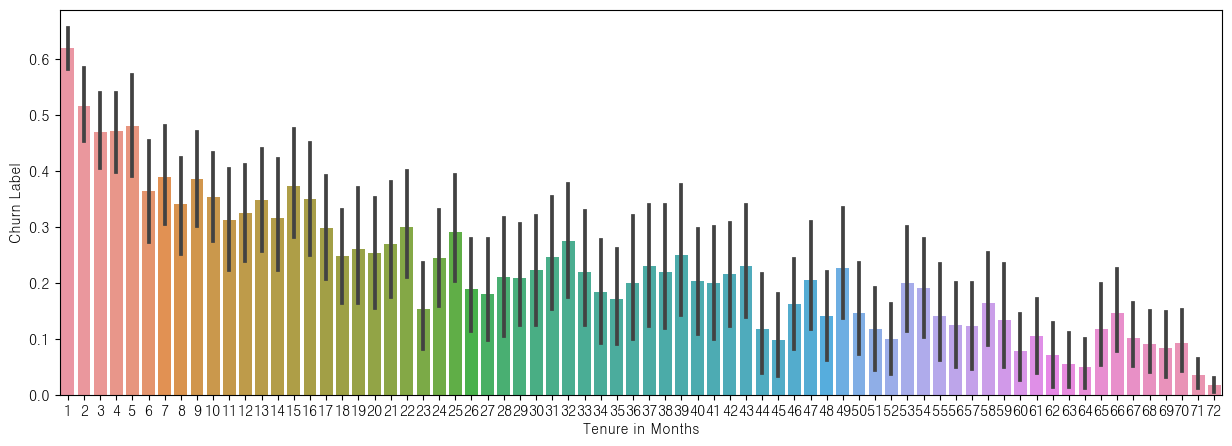

In [15]:
# Tenure in Months만 따로 그려보기
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df_service, y="Churn Label", x="Tenure in Months", ax=ax1)

결과</br>
* Tenure in Months : 장기고객일수록 이탈율이 낮다.

<AxesSubplot:xlabel='Avg Monthly GB Download', ylabel='Churn Label'>

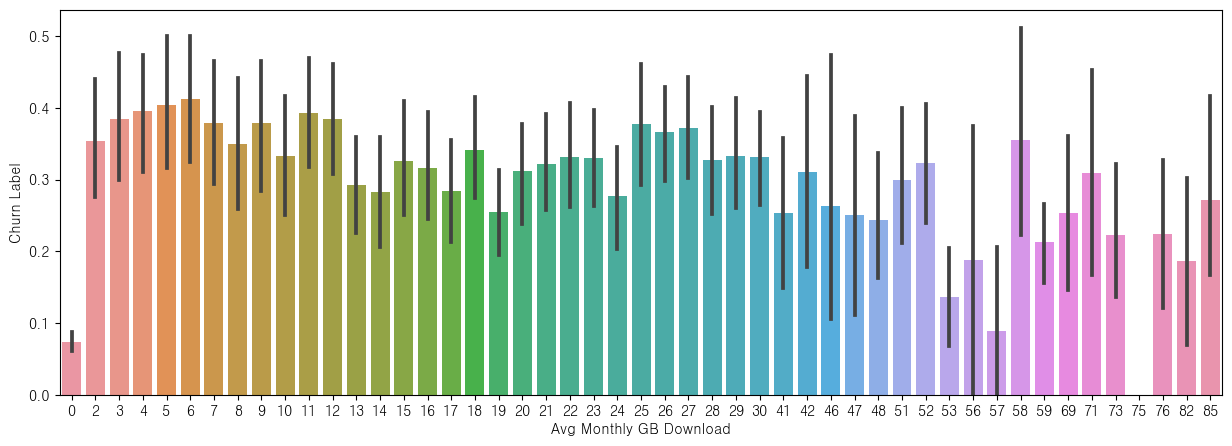

In [16]:
# Avg Monthly GB Download 이상치(39값) 삭제 후 다시 그려보기

df_service.drop(df_service[df_service['Avg Monthly GB Download'] == 39].index, inplace=True)                      
           
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df_service, y="Churn Label", x="Avg Monthly GB Download", ax=ax1)

결과</br>
* Avg Monthly GB Download : 대체적으로 비슷한 이탈율을 보이지만 데이터를 많이 다운받을 수록 이탈율이 적다.

## 모든 feature 결과

<유의미한 차이가 있는 feature>
* Age : 연령이 높아질수록 이탈율이 높다.
* Under 30 : 30세 이상의 사람들의 이탈율이 더 높다.
* Senior Citizen : 고령자(65세 이상)인 사람들의 이탈율이 더 높다.
* Married : 결혼하지 않은 사람들의 이탈율이 더 높다.
* Dependents : 부양가족이 있는 경우의 이탈율이 더 높다.
* Number of Dependents : 부양가족수가 0일 때 이탈율이 높으며 4명부터 7명까지 이탈율이 점점 높아진다. 8,9명의 경우 이상치로 판단할지 고려해야 함.
* Referred a Friend : 친구나 가족을 추천한 적이 없을 수록 이탈율이 높다.
* Number of Referrals : 0번 또는 1번 추천한 사람의 이탈율이 높다.
* Offer : 제품 E를 제안받은 사람들의 이탈율이 높다. A를 제안받은 사람의 이탈율이 가장 낮다.
* Internet Service : 인터넷 서비스에 가입되어 있을수록 이탈율이 높다.
* Internet Type : 광섬유 케이블에 가입된 사람의 이탈율이 가장 높다.
* Online Security : 온라인 보안 서비스에 가입되어 있지 않은 사람의 이탈율이 높다.
* Online Backup ; 온라인 백업 서비스에 가입되어 있지 않은 사람의 이탈율이 높다.
* Device Protection Plan : 기기고장플랜 서비스에 가입되어 있지 않은 사람의 이탈율이 높다.
* Premium Tech Support : 프리미엄 기술 지원 서비스에 가입되어 있지 않은 사람의 이탈율이 높다.
* Streaming TV : 스트리밍TV 를 이용하지 않은 경우에 이탈율이 높다.
* Streaming Movies : 스트리밍 영화 서비스를 이요하지 않은 경우에 이탈율이 높다.
* Streaming Music : 스트리밍 음악 서비스를 이용하지 않는 경우 이탈율이 높다.
* Unlimited Data : 무제한 데이터 이용을 위해 추가사용료를 지불한 사람의 이탈율이 더 높다.
* Contract : 월 청구 형식으로 계약한 사람의 이탈율이 더 높다.
* Paperless Billing : 종이 청구서를 이용하지 않는 사람의 이탈율이 더 높다.
* Payment Method : 계좌이체, 우편수표로 지불할 경우 이탈율이 높다. 신용카드를 이용할수록 이탈율이 낮다.
* Number of Referrals : 추천한 지인이 많을수록 이탈율이 높다.
* Tenure in Months : 단기 고객일수록 이탈율이 높다.
* Monthly Charge : 월 요금이 높을수록 이탈율이 높다.
* Total Charges : 지정된 분기 말까지 계산된 고객의 총 요금은 낮을수록 이탈율이 높다.
* Total Refunds : 총 환불 금액이 적을수록 이탈율이 높다. => 어느 상황에서 환불이 이루어지는지? ex) 추가 데이터를 모두 사용하지 못했을 경우 등
* Total Long Distance Charges : 총 장거리 요금이 높을수록 이탈율이 낮다.
* Total Revenue : 총 매출?이 낮을수록 이탈율이 높다.


<유의미한 차이가 없는 feature>
* Gender : 남녀 차이 없어보임
* Multiple Lines : 중복 회선 가입 여부에 따른 이탈율도 뚜렷한 차이가 없으나 중복회선에 가입되어 있을 경우의 이탈율이 더 높다.
* Phone Service : 집 전화 서비스 가입 여부에 따른 이탈율은 뚜렷한 차이가 없다.
* Avg Monthly Long Distance Charges : 월평균 장거리 요금에 따른 이탈율의 차이는 거의 없다.
* Avg Monthly GB Download : 월평균 다운로드 용량이 크면 이탈율이 높지만 큰 차이는 없다.
* Total Extra Data Charges : 추가 요금의 경우 이탈할 경우, 이탈하지 않는 경우에서의 차이가 거의 없다.

# 이탈점수에 따른 EDA

## 인구통계

In [17]:
df_demographics = df.iloc[:,[2,3,4,5,6,7,8,42]] # customerID, count 컬럼 제외
print(df_demographics.shape)
df_demographics.head()

(7043, 8)


,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Churn Score
0,0,78,0,1,0,0,0,91
1,1,74,0,1,1,1,1,69
2,0,71,0,1,0,1,3,81
3,1,78,0,1,1,1,1,88
4,1,80,0,1,1,1,1,67


<AxesSubplot:xlabel='Number of Dependents', ylabel='Churn Score'>

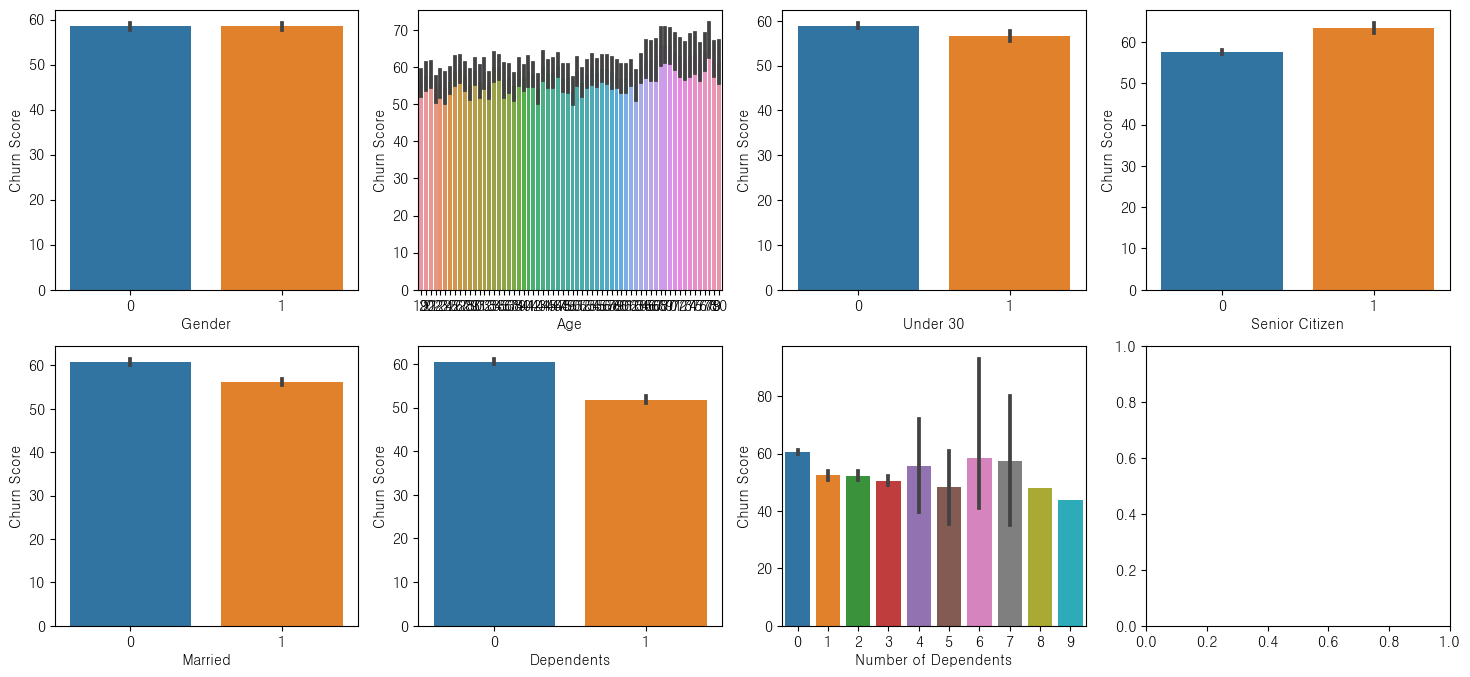

In [18]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, _)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(18, 8)

sns.barplot(data=df_demographics, x="Gender", y="Churn Score", ax=ax1)
sns.barplot(data=df_demographics, x="Age", y="Churn Score", ax=ax2)
sns.barplot(data=df_demographics, x="Under 30", y="Churn Score", ax=ax3)
sns.barplot(data=df_demographics, x="Senior Citizen", y="Churn Score", ax=ax4)
sns.barplot(data=df_demographics, x="Married", y="Churn Score", ax=ax5)
sns.barplot(data=df_demographics, x="Dependents", y="Churn Score", ax=ax6)
sns.barplot(data=df_demographics, x="Number of Dependents", y="Churn Score", ax=ax7)

<AxesSubplot:xlabel='Age', ylabel='Churn Score'>

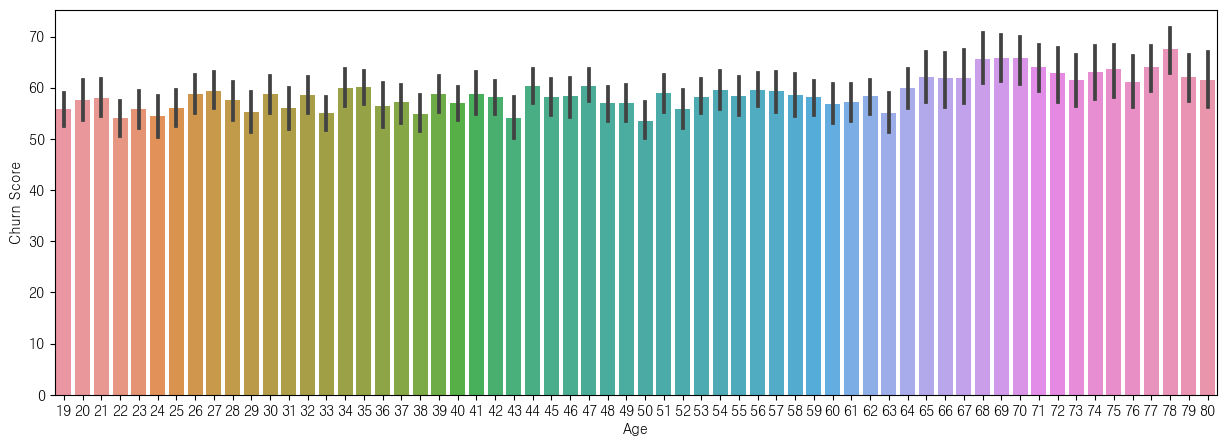

In [19]:
# Age만 따로 그려보기
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df_demographics, x="Age", y="Churn Score", ax=ax1)

결과</br>
* Gender : 남녀 차이 없어 보임.
* Age : 나이별 뚜렷한 차이 없어 보임.
* Under 30 : 차이 없어 보임.
* Senior Citizen : 차이 없어보임. 고령자일 경우 점수 더 높긴 함.
* Married : 차이 없어보임. 결혼하지 않았을 경우 점수 더 높긴 함.
* Dependents : 다른 feature들에 비해 차이는 있음. 부양가족 수 없을 경우 점수가 더 높음.
* Number of Dependents : 부양가족 수별 차이는 없어 보임.

## 서비스

In [20]:
df_service = df.iloc[:,10:37]
df_service['Churn Score'] = df['Churn Score']
print(df_service.shape)
df_service.head()

(7043, 28)


,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Score
0,0,0,1,None,0,0.00,0,1,DSL,8,...,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,91
1,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,17,...,Month-to-Month,1,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,69
2,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,52,...,Month-to-Month,1,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,81
3,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,12,...,Month-to-Month,1,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,88
4,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,14,...,Month-to-Month,1,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,67


### 범주형

<AxesSubplot:xlabel='Internet Service', ylabel='Churn Score'>

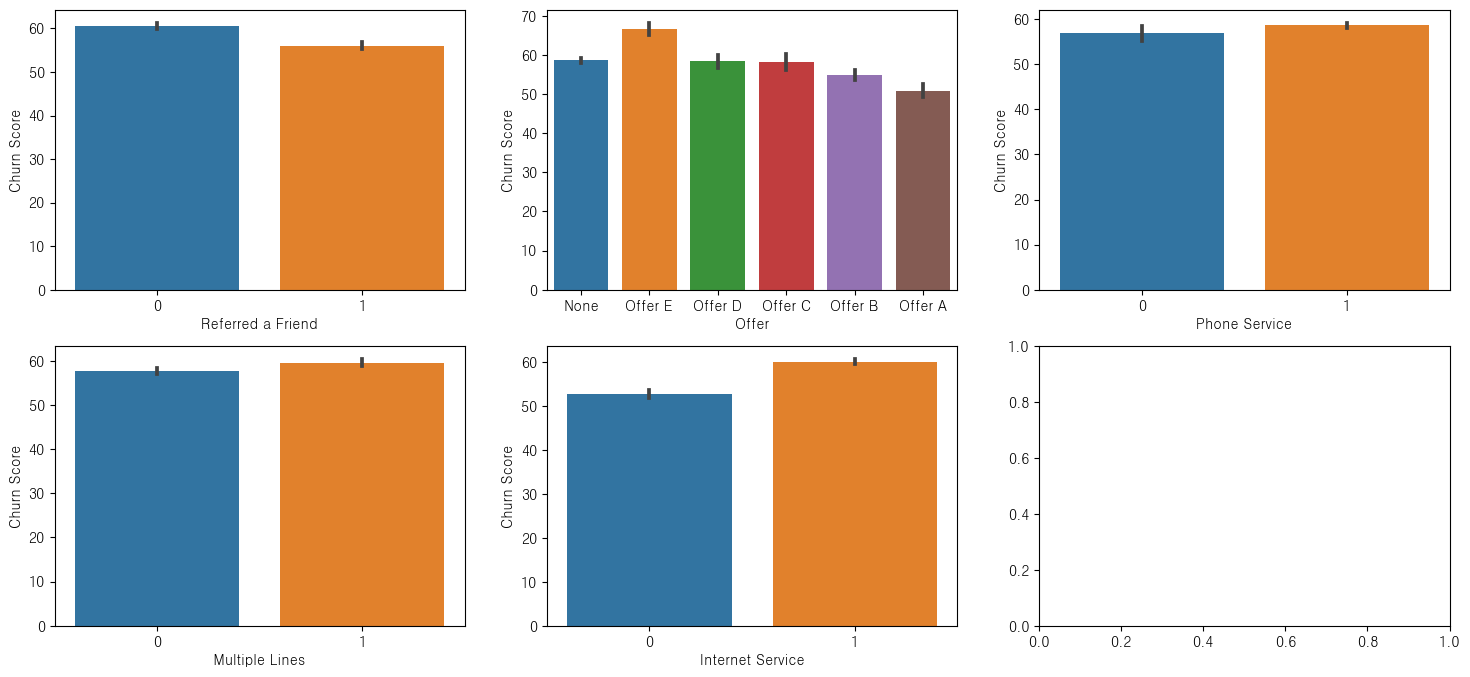

In [21]:
figure, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=df_service, y="Churn Score", x="Referred a Friend", ax=ax1)
sns.barplot(data=df_service, y="Churn Score", x="Offer", ax=ax2)
sns.barplot(data=df_service, y="Churn Score", x="Phone Service", ax=ax3)
sns.barplot(data=df_service, y="Churn Score", x="Multiple Lines", ax=ax4)
sns.barplot(data=df_service, y="Churn Score", x="Internet Service", ax=ax5)

결과</br>
* Referred a Friend : 지인 추천 여부에 따른 차이 없어 보임.
* Offer : 제품 E를 제안받은 사람들의 이탈 점수가 높다. A를 제안받은 사람의 이탈 점수가 가장 낮다.
* Phone Service : 집 전화 서비스 가입 여부에 따른 이탈율은 뚜렷한 차이가 없다.
* Multiple Lines : 중복 회선 가입 여부에 따른 이탈율도 뚜렷한 차이가 없다.
* Internet Service : 인터넷 서비스에 가입되어 있을수록 이탈 점수가 높다.

<AxesSubplot:xlabel='Payment Method', ylabel='Churn Score'>

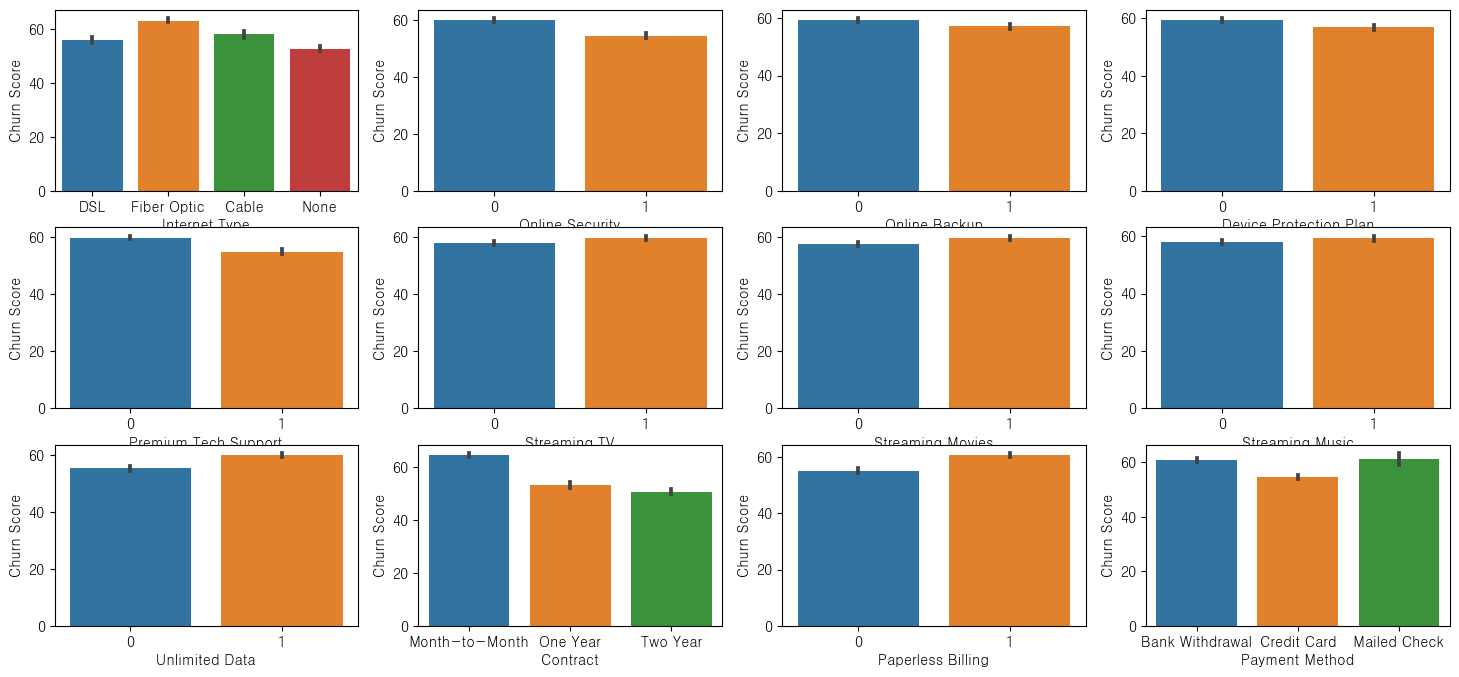

In [22]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(nrows=3, ncols=4)
figure.set_size_inches(18, 8)

sns.barplot(data=df_service, y="Churn Score", x="Internet Type", ax=ax1)
sns.barplot(data=df_service, y="Churn Score", x="Online Security", ax=ax2)
sns.barplot(data=df_service, y="Churn Score", x="Online Backup", ax=ax3)
sns.barplot(data=df_service, y="Churn Score", x="Device Protection Plan", ax=ax4)
sns.barplot(data=df_service, y="Churn Score", x="Premium Tech Support", ax=ax5)
sns.barplot(data=df_service, y="Churn Score", x="Streaming TV", ax=ax6)
sns.barplot(data=df_service, y="Churn Score", x="Streaming Movies", ax=ax7)
sns.barplot(data=df_service, y="Churn Score", x="Streaming Music", ax=ax8)
sns.barplot(data=df_service, y="Churn Score", x="Unlimited Data", ax=ax9)
sns.barplot(data=df_service, y="Churn Score", x="Contract", ax=ax10)
sns.barplot(data=df_service, y="Churn Score", x="Paperless Billing", ax=ax11)
sns.barplot(data=df_service, y="Churn Score", x="Payment Method", ax=ax12)

결과</br>
* Internet Type : 광섬유 케이블에 가입된 사람의 이탈 점수가 가장 높다.
* Online Security : 온라인 보안 서비스에 가입되어 있지 않은 사람의 이탈 점수가 높다. (거의 같다.)
* Online Backup ; 온라인 백업 서비스에 가입되어 있지 않은 사람의 이탈 점수가 높다.(거의 같다.)
* Device Protection Plan : 기기고장플랜 서비스에 가입되어 있지 않은 사람의 이탈 점수가 높다. (거의 같다.)
* Premium Tech Support : 프리미엄 기술 지원 서비스에 가입되어 있지 않은 사람의 이탈 점수가 높다.
* Streaming TV : 스트리밍TV 를 이용하는 경우에 이탈 점수가 높다. (거의 같다.)
* Streaming Movies : 스트리밍 영화 서비스를 이용하는 경우에 이탈 점수가 높다. (거의 같다.)
* Streaming Music : 점수가 거의 같다.
* Unlimited Data : 무제한 데이터 이용을 위해 추가사용료를 지불한 사람의 이탈 점수가 더 높다.
* Contract : 월 청구 형식으로 계약한 사람의 이탈 점수가 가장 높다.
* Paperless Billing : 종이 청구서를 이용하지 않는 사람의 이탈 점수가 더 높다.
* Payment Method : 신용카드를 이용할수록 이탈 점수가 낮다.

### 수치형

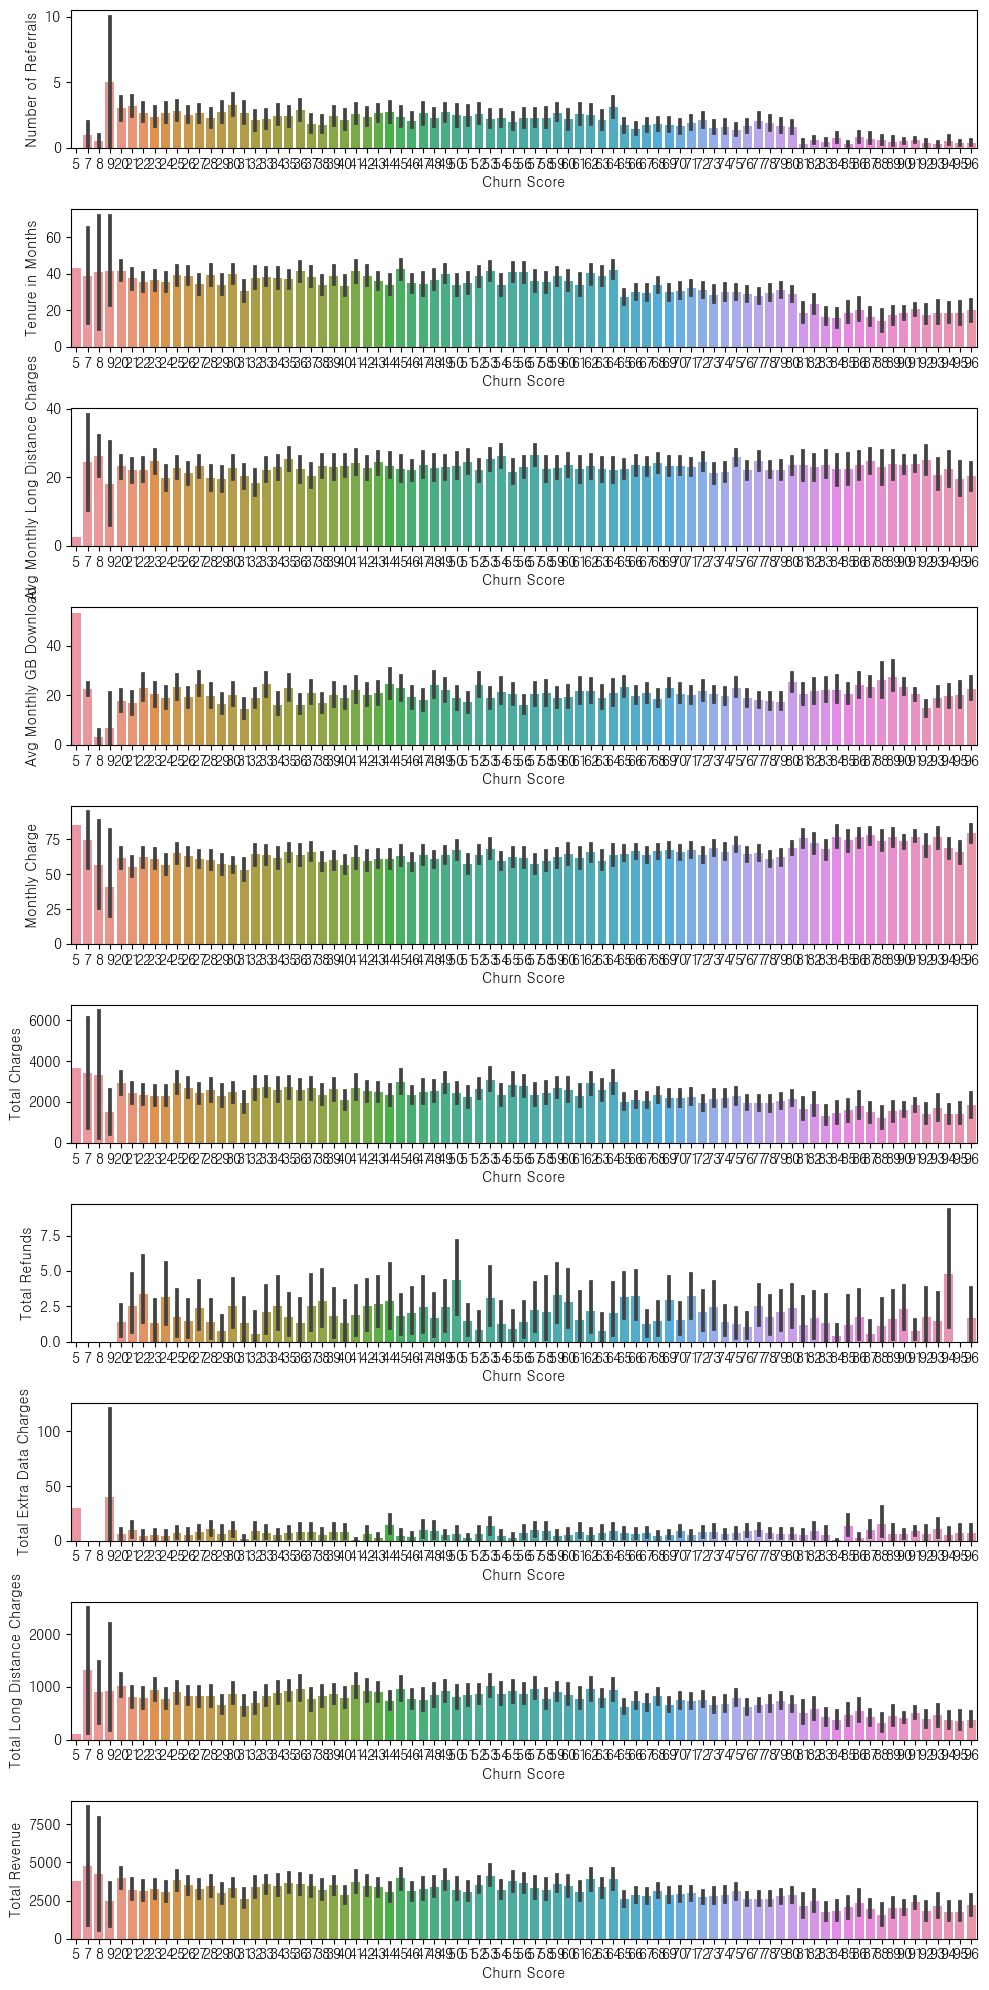

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 컬럼들
cols = ['Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
        'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
        'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# 그래프의 크기 설정
plt.figure(figsize=(10, 20))

# 서브플롯 그리기
for i, col in enumerate(cols):
    plt.subplot(10, 1, i + 1)
    #sns.barplot(y=col, x='Churn Label', data=df_service, orient='h', ci=None)
    sns.barplot(data=df_service, x="Churn Score", y=col)
    plt.ylabel(col)
    plt.xlabel('Churn Score')

# 그래프 간의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

결과</br>
* Number of Referrals : 지인 추천 수가 적은 구간에서 이탈 점수가 높다.
* Tenure in Months : 단기고객일수록 이탈 점수가 높다.
* Avg Monthly Long Distance Charges : 월평균 장거리 요금에 따른 이탈 점수의 차이는 거의 없다.
* Avg Monthly GB Download : 월평균 다운로드 용량이 아주 적을 경우에 이탈 점수가 낮고 나머지 점수는 큰 특징이 없다.
* Monthly Charge : 월 요금이 낮을 경우(7,8)인 경우에만 다른 요금 구간에 비해 이탈 점수가 낮다.
* Total Charges : 지정된 분기 말까지 계산된 고객의 총 요금이 높은 구간에서의 이탈 점수가 낮다.
* Total Refunds : 총 환불 금액에 따른 특징 없음.
* Total Extra Data Charges : 추가 요금에 따른 큰 차이가 없다.
* Total Long Distance Charges : 총 장거리 요금이 낮은 구간에서 이탈 점수가 낮다.
* Total Revenue : 매출이 적은 구간에서 이탈 점수가 높다.

<AxesSubplot:xlabel='Tenure in Months', ylabel='Churn Score'>

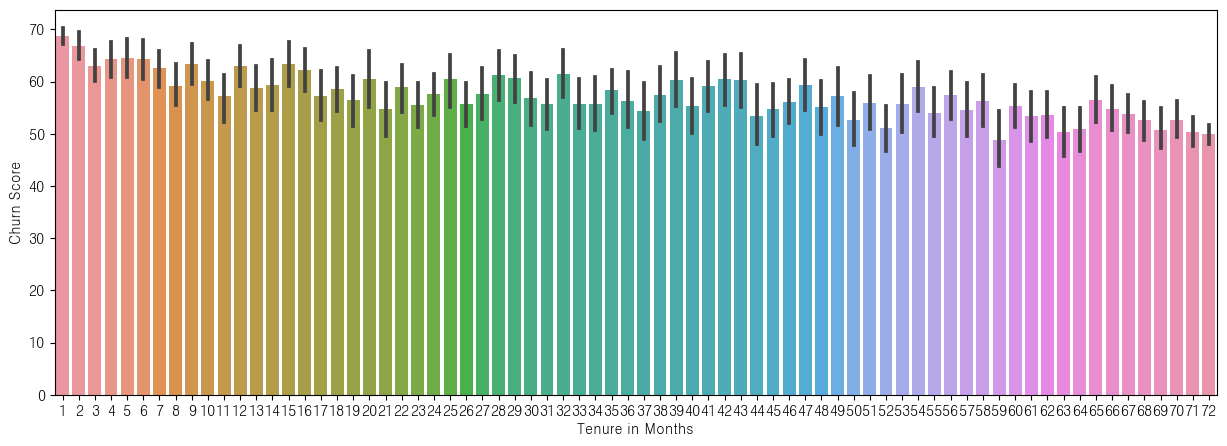

In [24]:
# Tenure in Months만 다시 그려보기
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df_service, y="Churn Score", x="Tenure in Months", ax=ax1)

결과</br>
* Tenure in Months : 장기고객일수록 이탈 점수가 낮다.

<AxesSubplot:xlabel='Avg Monthly GB Download', ylabel='Churn Score'>

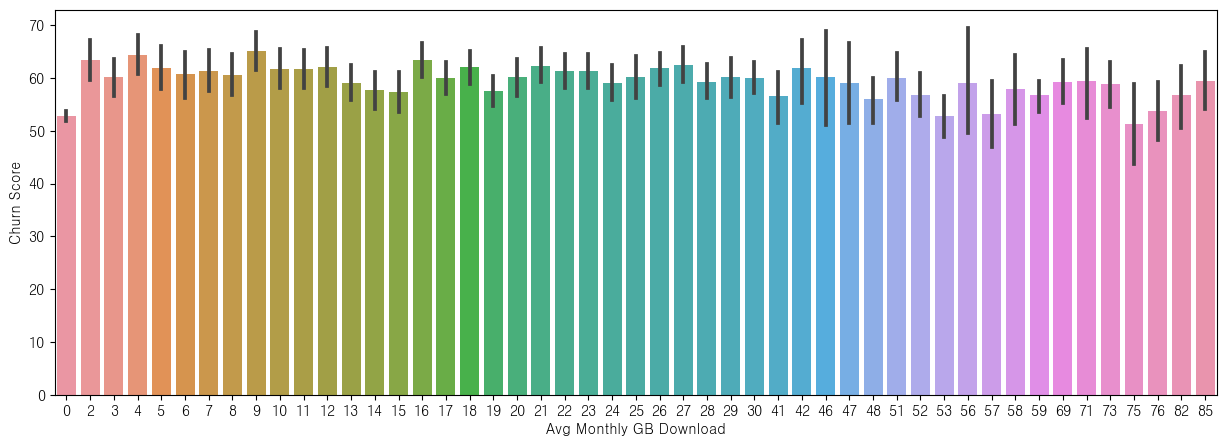

In [25]:
# 이상치(39값) 삭제 후 Avg Monthly GB Download 다시 그리기

df_service.drop(df_service[df_service['Avg Monthly GB Download'] == 39].index, inplace=True)                      
           
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=df_service, y="Churn Score", x="Avg Monthly GB Download", ax=ax1)

결과</br>
* Avg Monthly GB Download : 대체적으로 비슷한 이탈율을 보이지만 데이터를 많이 다운받을 수록 이탈율이 적다.

## 모든 feature 결과

<유의미한 차이가 있는 feature>
* Dependents : 다른 feature들에 비해 차이는 있음. 부양가족 수 없을 경우 점수가 더 높음.
* Offer : 제품 E를 제안받은 사람들의 이탈 점수가 높다. A를 제안받은 사람의 이탈 점수가 가장 낮다.
* Internet Service : 인터넷 서비스에 가입되어 있을수록 이탈 점수가 높다.
* Internet Type : 광섬유 케이블에 가입된 사람의 이탈 점수가 가장 높다.
* Premium Tech Support : 프리미엄 기술 지원 서비스에 가입되어 있지 않은 사람의 이탈 점수가 높다.
* Unlimited Data : 무제한 데이터 이용을 위해 추가사용료를 지불한 사람의 이탈 점수가 더 높다.
* Contract : 월 청구 형식으로 계약한 사람의 이탈 점수가 가장 높다.
* Paperless Billing : 종이 청구서를 이용하지 않는 사람의 이탈 점수가 더 높다.
* Payment Method : 신용카드를 이용할수록 이탈 점수가 낮다.
* Referred a Friend : 지인 추천 수가 적은 구간에서 이탈 점수가 높다.
* Tenure in Months : 단기고객일수록 이탈 점수가 높다.
* Monthly Charge : 월 요금이 낮을 경우(7,8)인 경우에만 다른 요금 구간에 비해 이탈 점수가 낮다.
* Total Charges : 지정된 분기 말까지 계산된 고객의 총 요금이 높은 구간에서의 이탈 점수가 낮다.
* Total Long Distance Charges : 총 장거리 요금이 낮은 구간에서 이탈 점수가 낮다.
* Total Revenue : 매출이 적은 구간에서 이탈 점수가 높다.


<유의미한 차이가 없는 feature>

* Gender : 남녀 차이 없어 보임.
* Age : 나이별 뚜렷한 차이 없어 보임.
* Under 30 : 차이 없어 보임.
* Senior Citizen : 차이 없어보임. 고령자일 경우 점수 더 높긴 함.
* Married : 차이 없어보임. 결혼하지 않았을 경우 점수 더 높긴 함.
* Number of Dependents : 부양가족 수별 차이는 없어 보임.
* Referred a Friend : 지인 추천 여부에 따른 차이 없어 보임.
* Phone Service : 집 전화 서비스 가입 여부에 따른 이탈율은 뚜렷한 차이가 없다.
* Multiple Lines : 중복 회선 가입 여부에 따른 이탈율도 뚜렷한 차이가 없다.
* Online Security : 온라인 보안 서비스에 가입되어 있지 않은 사람의 이탈 점수가 높다. (거의 같다.)
* Online Backup ; 온라인 백업 서비스에 가입되어 있지 않은 사람의 이탈 점수가 높다.(거의 같다.)
* Device Protection Plan : 기기고장플랜 서비스에 가입되어 있지 않은 사람의 이탈 점수가 높다. (거의 같다.)
* Streaming TV : 스트리밍TV 를 이용하는 경우에 이탈 점수가 높다. (거의 같다.)
* Streaming Movies : 스트리밍 영화 서비스를 이용하는 경우에 이탈 점수가 높다. (거의 같다.)
* Streaming Music : 점수가 거의 같다.
* Avg Monthly Long Distance Charges : 월평균 장거리 요금에 따른 이탈 점수의 차이는 거의 없다.
* Avg Monthly GB Download : 월평균 다운로드 용량이 아주 적을 경우에 이탈 점수가 낮고 나머지 점수는 큰 특징이 없다.
* Total Refunds : 총 환불 금액에 따른 특징 없음.
* Total Extra Data Charges : 추가 요금에 따른 큰 차이가 없다.

# 상관분석

## 이탈 여부와의 상관분석

### 수치형 - corr()

In [26]:
# 수치형 변수들과 'Churn Label' 레이블

num_cols_label = ['Age', 'Number of Dependents','Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
        'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
        'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Churn Label']

num_df_label = df[num_cols_label]
num_df_label

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label
0,78,0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65,1
1,74,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10,1
2,71,3,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,1
3,78,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07,1
4,80,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,0,0,72,22.77,0,21.15,1419.40,19.31,0,1639.44,3039.53,0
7039,38,2,1,24,36.05,24,84.80,1990.50,48.23,0,865.20,2807.47,0
7040,30,2,4,72,29.66,59,103.20,7362.90,45.38,0,2135.52,9453.04,0
7041,32,2,1,11,0.00,17,29.60,346.45,27.24,0,0.00,319.21,0


In [27]:
# 상관계수 행렬 계산
num_df_label_corr = num_df_label.corr()

# 결과 출력
num_df_label_corr

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label
Age,1.000000,-0.119000,-0.025141,0.009927,-0.011749,-0.376595,0.144685,0.059684,0.024168,0.025036,0.003065,0.048265,0.115760
Number of Dependents,-0.119000,1.000000,0.278003,0.108237,-0.007324,0.129966,-0.131837,0.022535,0.014023,-0.014436,0.068966,0.038038,-0.218780
Number of Referrals,-0.025141,0.278003,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853,-0.286540
Tenure in Months,0.009927,0.108237,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146,-0.352861
Avg Monthly Long Distance Charges,-0.011749,-0.007324,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291,0.008120
Avg Monthly GB Download,-0.376595,0.129966,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726,0.048868
Monthly Charge,0.144685,-0.131837,0.028173,0.247582,0.138396,0.391787,1.000000,0.651236,0.033482,0.126244,0.246300,0.588887,0.193356
Total Charges,0.059684,0.022535,0.250378,0.826074,0.069500,0.223268,0.651236,1.000000,0.039558,0.121859,0.610185,0.972212,-0.198546
Total Refunds,0.024168,0.014023,0.024756,0.059021,-0.018644,0.002397,0.033482,0.039558,1.000000,0.016755,0.028113,0.036984,-0.033709
Total Extra Data Charges,0.025036,-0.014436,0.000350,0.082266,0.002414,0.088939,0.126244,0.121859,0.016755,1.000000,0.058871,0.122496,0.007139


In [28]:
num_df_label_corr.style.background_gradient()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label
Age,1.000000,-0.119000,-0.025141,0.009927,-0.011749,-0.376595,0.144685,0.059684,0.024168,0.025036,0.003065,0.048265,0.115760
Number of Dependents,-0.119000,1.000000,0.278003,0.108237,-0.007324,0.129966,-0.131837,0.022535,0.014023,-0.014436,0.068966,0.038038,-0.218780
Number of Referrals,-0.025141,0.278003,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853,-0.286540
Tenure in Months,0.009927,0.108237,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146,-0.352861
Avg Monthly Long Distance Charges,-0.011749,-0.007324,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291,0.008120
Avg Monthly GB Download,-0.376595,0.129966,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726,0.048868
Monthly Charge,0.144685,-0.131837,0.028173,0.247582,0.138396,0.391787,1.000000,0.651236,0.033482,0.126244,0.246300,0.588887,0.193356
Total Charges,0.059684,0.022535,0.250378,0.826074,0.069500,0.223268,0.651236,1.000000,0.039558,0.121859,0.610185,0.972212,-0.198546
Total Refunds,0.024168,0.014023,0.024756,0.059021,-0.018644,0.002397,0.033482,0.039558,1.000000,0.016755,0.028113,0.036984,-0.033709
Total Extra Data Charges,0.025036,-0.014436,0.000350,0.082266,0.002414,0.088939,0.126244,0.121859,0.016755,1.000000,0.058871,0.122496,0.007139


결과</br>

* -1.0과 -0.7 사이 -> 강한 음적 선형관계


* -0.7과 -0.3 사이 -> 뚜렷한 음적 선형관계</br>
Tenure in Months


* -0.3과 -0.1 사이 -> 약한 음적 선형관계</br>
Number of Dependents, Number of Referrals, Total Charges, Total Long Distance Charges, Total Revenue


* -0.1과 +0.1 사이 -> 거의 무시될 수 있는 선형관계</br>
Avg Monthly Long Distance Charges, Avg Monthly GB Download, Total Refunds, Total Extra Data Charges


* +0.1과 +0.3 사이 -> 약한 양적 선형관계</br>
Age, Monthly Charge


* +0.3과 +0.7 사이 -> 뚜렷한 양적 선형관계


* +0.7과 +1.0 사이 -> 강한 양적 선형관계

### 수치형 - pointbiserialr
X변수가 연속형이고, Y변수는 이분변수일 때 사용하는 상관계수

In [29]:
from scipy import stats

# 데이터프레임 생성 (데이터프레임을 여기에 적용해야 함)
# 예를 들어, df라는 이름의 데이터프레임을 사용한다고 가정
# df = pd.read_csv('데이터 파일 경로')

# 수치형 변수와 'Churn Label' 열 선택
num_cols_label = ['Age', 'Number of Dependents','Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
        'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
        'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
binary_col = 'Churn Label'

# Point biserial correlation 계산
point_biserial_correlations = {}
for col in num_cols_label:
    correlation, p_value = stats.pointbiserialr(df[col], df[binary_col])
    point_biserial_correlations[col] = correlation

# 결과 출력
print("Point biserial correlations:")
for col, correlation in point_biserial_correlations.items():
    print(f"{col}: {correlation:.2f}")


Point biserial correlations:
Age: 0.12
Number of Dependents: -0.22
Number of Referrals: -0.29
Tenure in Months: -0.35
Avg Monthly Long Distance Charges: 0.01
Avg Monthly GB Download: 0.05
Monthly Charge: 0.19
Total Charges: -0.20
Total Refunds: -0.03
Total Extra Data Charges: 0.01
Total Long Distance Charges: -0.22
Total Revenue: -0.22


결과</br>

* -1.0과 -0.7 사이 -> 강한 음적 선형관계


* -0.7과 -0.3 사이 -> 뚜렷한 음적 선형관계</br>
Tenure in Months


* -0.3과 -0.1 사이 -> 약한 음적 선형관계</br>
Number of Dependents, Number of Referrals, Total Charges, Total Long Distance Charges, Total Revenue


* -0.1과 +0.1 사이 -> 거의 무시될 수 있는 선형관계</br>
Avg Monthly Long Distance Charges, Avg Monthly GB Download, Total Refunds, Total Extra Data Charges


* +0.1과 +0.3 사이 -> 약한 양적 선형관계</br>
Age, Monthly Charge 


* +0.3과 +0.7 사이 -> 뚜렷한 양적 선형관계


* +0.7과 +1.0 사이 -> 강한 양적 선형관계

### 범주형 - 카이제곱 검정

In [37]:
from scipy.stats import chi2_contingency

# 범주형 변수 리스트
cate_cols = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 
             'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 
             'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 
             'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
             'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 
             'Paperless Billing']

# 결과를 저장할 데이터프레임 초기화
df_cate_corr_label = pd.DataFrame(columns=['Variable', 'Chi-Square Statistic', 'P-value', 'Correlation'])

# for 문을 사용하여 각 범주형 변수와 Churn Label 간의 상관관계를 확인
alpha = 0.05

for col in cate_cols:
    # 크로스 테이블 생성
    cross_table = pd.crosstab(index=df[col], columns=df['Churn Label'])
    
    # 카이제곱 검정 실행
    chi2, p, dof, expected = chi2_contingency(cross_table)
    
    # 결과 해석
    if p < alpha:
        correlation = "상관관계가 높다"
    else:
        correlation = "상관관계가 낮다"
    
    # 결과를 데이터프레임에 추가
    df_cate_corr_label = df_cate_corr_label.append({'Variable': col, 
                                    'Chi-Square Statistic': chi2, 
                                    'P-value': p, 
                                    'Correlation': correlation}, ignore_index=True)

# 결과 데이터프레임 출력
df_cate_corr_label


C:\Users\ksh\AppData\Local\Temp\ipykernel_3612\2993792706.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cate_corr_label = df_cate_corr_label.append({'Variable': col,
C:\Users\ksh\AppData\Local\Temp\ipykernel_3612\2993792706.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cate_corr_label = df_cate_corr_label.append({'Variable': col,
C:\Users\ksh\AppData\Local\Temp\ipykernel_3612\2993792706.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cate_corr_label = df_cate_corr_label.append({'Variable': col,
C:\Users\ksh\AppData\Local\Temp\ipykernel_3612\2993792706.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ca

,Variable,Chi-Square Statistic,P-value,Correlation
0,Gender,0.484083,4.865787e-01,상관관계가 낮다
1,Under 30,20.690894,5.397206e-06,상관관계가 높다
2,Senior Citizen,159.426300,1.510067e-36,상관관계가 높다
3,Married,158.733382,2.139911e-36,상관관계가 높다
4,Dependents,433.734379,2.500972e-96,상관관계가 높다
5,Referred a Friend,155.940342,8.723768e-36,상관관계가 높다
6,Offer,481.725489,7.020357e-102,상관관계가 높다
7,Phone Service,0.915033,3.387825e-01,상관관계가 낮다
8,Multiple Lines,11.143251,8.433795e-04,상관관계가 높다
9,Internet Service,364.519799,2.920300e-81,상관관계가 높다


In [38]:
df_cate_corr_label[df_cate_corr_label['Correlation']=='상관관계가 낮다']

,Variable,Chi-Square Statistic,P-value,Correlation
0,Gender,0.484083,0.486579,상관관계가 낮다
7,Phone Service,0.915033,0.338783,상관관계가 낮다


## 이탈 점수와의 상관분석

### 수치형 - corr()

In [32]:
# 수치형 변수들과 'Churn Socre' 레이블

num_cols_score = ['Age', 'Number of Dependents','Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
        'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
        'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Churn Score']

num_df_score = df[num_cols_score]
num_df_score

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Score
0,78,0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65,91
1,74,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10,69
2,71,3,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,81
3,78,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07,88
4,80,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,0,0,72,22.77,0,21.15,1419.40,19.31,0,1639.44,3039.53,45
7039,38,2,1,24,36.05,24,84.80,1990.50,48.23,0,865.20,2807.47,59
7040,30,2,4,72,29.66,59,103.20,7362.90,45.38,0,2135.52,9453.04,71
7041,32,2,1,11,0.00,17,29.60,346.45,27.24,0,0.00,319.21,59


In [33]:
# 상관계수 행렬 계산
num_df_label_corr = num_df_score.corr()

# 결과 출력
num_df_label_corr

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Score
Age,1.000000,-0.119000,-0.025141,0.009927,-0.011749,-0.376595,0.144685,0.059684,0.024168,0.025036,0.003065,0.048265,0.083919
Number of Dependents,-0.119000,1.000000,0.278003,0.108237,-0.007324,0.129966,-0.131837,0.022535,0.014023,-0.014436,0.068966,0.038038,-0.160743
Number of Referrals,-0.025141,0.278003,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853,-0.202209
Tenure in Months,0.009927,0.108237,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146,-0.224982
Avg Monthly Long Distance Charges,-0.011749,-0.007324,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291,0.021857
Avg Monthly GB Download,-0.376595,0.129966,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726,0.022421
Monthly Charge,0.144685,-0.131837,0.028173,0.247582,0.138396,0.391787,1.000000,0.651236,0.033482,0.126244,0.246300,0.588887,0.132115
Total Charges,0.059684,0.022535,0.250378,0.826074,0.069500,0.223268,0.651236,1.000000,0.039558,0.121859,0.610185,0.972212,-0.123961
Total Refunds,0.024168,0.014023,0.024756,0.059021,-0.018644,0.002397,0.033482,0.039558,1.000000,0.016755,0.028113,0.036984,-0.013516
Total Extra Data Charges,0.025036,-0.014436,0.000350,0.082266,0.002414,0.088939,0.126244,0.121859,0.016755,1.000000,0.058871,0.122496,0.008343


In [34]:
num_df_label_corr.style.background_gradient()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Score
Age,1.000000,-0.119000,-0.025141,0.009927,-0.011749,-0.376595,0.144685,0.059684,0.024168,0.025036,0.003065,0.048265,0.083919
Number of Dependents,-0.119000,1.000000,0.278003,0.108237,-0.007324,0.129966,-0.131837,0.022535,0.014023,-0.014436,0.068966,0.038038,-0.160743
Number of Referrals,-0.025141,0.278003,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853,-0.202209
Tenure in Months,0.009927,0.108237,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146,-0.224982
Avg Monthly Long Distance Charges,-0.011749,-0.007324,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291,0.021857
Avg Monthly GB Download,-0.376595,0.129966,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726,0.022421
Monthly Charge,0.144685,-0.131837,0.028173,0.247582,0.138396,0.391787,1.000000,0.651236,0.033482,0.126244,0.246300,0.588887,0.132115
Total Charges,0.059684,0.022535,0.250378,0.826074,0.069500,0.223268,0.651236,1.000000,0.039558,0.121859,0.610185,0.972212,-0.123961
Total Refunds,0.024168,0.014023,0.024756,0.059021,-0.018644,0.002397,0.033482,0.039558,1.000000,0.016755,0.028113,0.036984,-0.013516
Total Extra Data Charges,0.025036,-0.014436,0.000350,0.082266,0.002414,0.088939,0.126244,0.121859,0.016755,1.000000,0.058871,0.122496,0.008343


결과</br>

* -1.0과 -0.7 사이 -> 강한 음적 선형관계


* -0.7과 -0.3 사이 -> 뚜렷한 음적 선형관계</br>



* -0.3과 -0.1 사이 -> 약한 음적 선형관계</br>
Number of Dependents, Number of Referrals, Tenure in Months, Total Charges, Total Long Distance Charges, Total Revenue


* -0.1과 +0.1 사이 -> 거의 무시될 수 있는 선형관계</br>
Age, Avg Monthly Long Distance Charges, Avg Monthly GB Download, Total Refunds, Total Extra Data Charges


* +0.1과 +0.3 사이 -> 약한 양적 선형관계</br>
Monthly Charge


* +0.3과 +0.7 사이 -> 뚜렷한 양적 선형관계


* +0.7과 +1.0 사이 -> 강한 양적 선형관계

### 범주형

In [39]:
from scipy.stats import chi2_contingency

# 범주형 변수 리스트
cate_cols = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 
             'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 
             'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 
             'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
             'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 
             'Paperless Billing']

# 결과를 저장할 데이터프레임 초기화
df_cate_corr_score = pd.DataFrame(columns=['Variable', 'Chi-Square Statistic', 'P-value', 'Correlation'])

# for 문을 사용하여 각 범주형 변수와 Churn Label 간의 상관관계를 확인
alpha = 0.05

for col in cate_cols:
    # 크로스 테이블 생성
    cross_table = pd.crosstab(index=df[col], columns=df['Churn Score'])
    
    # 카이제곱 검정 실행
    chi2, p, dof, expected = chi2_contingency(cross_table)
    
    # 결과 해석
    if p < alpha:
        correlation = "상관관계가 높다"
    else:
        correlation = "상관관계가 낮다"
    
    # 결과를 데이터프레임에 추가
    df_cate_corr_score = df_cate_corr_score.append({'Variable': col, 
                                    'Chi-Square Statistic': chi2, 
                                    'P-value': p, 
                                    'Correlation': correlation}, ignore_index=True)

# 결과 데이터프레임 출력
df_cate_corr_score


C:\Users\ksh\AppData\Local\Temp\ipykernel_3612\1643044281.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cate_corr_score = df_cate_corr_score.append({'Variable': col,
C:\Users\ksh\AppData\Local\Temp\ipykernel_3612\1643044281.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cate_corr_score = df_cate_corr_score.append({'Variable': col,
C:\Users\ksh\AppData\Local\Temp\ipykernel_3612\1643044281.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cate_corr_score = df_cate_corr_score.append({'Variable': col,
C:\Users\ksh\AppData\Local\Temp\ipykernel_3612\1643044281.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ca

,Variable,Chi-Square Statistic,P-value,Correlation
0,Gender,90.099008,2.063133e-01,상관관계가 낮다
1,Under 30,121.786878,1.815364e-03,상관관계가 높다
2,Senior Citizen,205.070840,6.134881e-13,상관관계가 높다
3,Married,180.027133,1.139164e-09,상관관계가 높다
4,Dependents,378.338601,2.703576e-40,상관관계가 높다
5,Referred a Friend,175.472391,4.166325e-09,상관관계가 높다
6,Offer,694.355066,3.652518e-18,상관관계가 높다
7,Phone Service,89.181619,2.260032e-01,상관관계가 낮다
8,Multiple Lines,92.991500,1.519122e-01,상관관계가 낮다
9,Internet Service,280.903040,3.857396e-24,상관관계가 높다


In [40]:
df_cate_corr_score[df_cate_corr_score['Correlation']=='상관관계가 낮다']

,Variable,Chi-Square Statistic,P-value,Correlation
0,Gender,90.099008,0.206313,상관관계가 낮다
7,Phone Service,89.181619,0.226003,상관관계가 낮다
8,Multiple Lines,92.991500,0.151912,상관관계가 낮다
13,Device Protection Plan,91.867783,0.171668,상관관계가 낮다
16,Streaming Movies,88.537535,0.240524,상관관계가 낮다
17,Streaming Music,81.036523,0.446594,상관관계가 낮다


파이썬에서 범주형 변수와 수치형(연속형) label과의 상관계수를 구할 수 있는 라이브러리가 제공되지 않는다. 따라서 적절한 통계적 테스트나 시각화를 사용하여 데이터 관계를 파악할 필요가 있다.

# label에 따른 유의미한 feature
시각화 및 상관분석 결과 모두 고려하여 최종 선택

## 이탈 여부 (Churn Label)

* 인구통계학</br>
부양가족 여부, 부양가족 수, 나이, 30세 이상?이하?, 고령 고객, 결혼여부


* 요금</br>
총 요금, 총 장거리 요금, 총 매출, 월 요금


* 만족도</br>
지인 추천 수, 지인추천 여부 


* 서비스</br>
인터넷 서비스 가입 여부,</br>
보안 서비스 가입 여부, 백업 서비스 가입 여부, 기기고장보험서비스 가입 여부,</br>
프리미엄기술지원 가입 여부, 무제한 데이터 가입 여부, 계약 형식, 지불 방식</br>


* 기타</br>
마케팅 제안, 스트리밍 TV, 스트리밍 영화, 스트리밍 음악

부양가족 여부와 부양가족 수처럼 같은 성격의 feature 중 하나만 선택할 필요 있음.

## 이탈 점수 (Churn Score)

* 인구통계학</br>
부양가족 여부


* 요금</br>
총 요금, 총 장거리 요금, 총 매출?, 월 요금


* 만족도</br>
지인추천 수


* 서비스</br>
가입 기간, 인터넷 서비스 가입 여부, 인터넷 타입, 프리미엄기술지원 가입 여부,
무제한데이터 가입 여부, 가입형태, 청구 방법


* 기타</br>
마케팅 제안

이탈 점수에 따른 feature 선정 결과 인구통계학 데이터가 부양가족 여부 하나만 남게 됨.</br>
현재 트렌드를 반영할 타사의 스트리밍 서비스 사용 여부 feature도 모두 제외됨.</br>
</br>
=> 고객의 라이프스타일을 대변하기 위한 인구통계학 데이터로 변수 추가할 것을 고려, 현재 트렌드 반영할 변수 추가 고려